# Deep Sequence Modeling

Deep sequence modeling is essentially applying neural network to problems involving sequential processing of data. Sequence data has memory and comes in many forms such as text, audio, video and financial time series. Thus, requiring a different modeling approaches.

## Recurrent Neural Network

Recurrent Neural Network (RNN) generalize the feedforward neural network with an internal memory state and good at modeling sequence data as it uses sequential memory for prediction. Sequential memory is a mechanism used to identify the sequence patterns. RNNs are faster and use less computational resources as there are less tensor operations. Sequence problems can be broadly categorized into the following types.

# Long Short Term Memory Network

Long Short Term Memory (LSTM) algorithm is a special kind of RNN, explicitly designed to avoid the long-term dependency problem by addressing the problem of short term memory. LSTM models are fundamental to deep learning for financial timeseries and have four interacting layers as given below.

# TensorFlow = Tensor + Flow

TensorFlow is an open-source library for numerical computation originally developed by researchers and engineers working at the Google Brain team. It was originally built as a proprietary machine learning system based on deep learning neural networks.

TensorFlow is made up of two words tensor and flow where Tensor is a multidimensional array and Flow is a graph of operations. Internally, TensorFlow implements machine learning algorithms as a graph of operations on multidimensional array. Tensor is a container for data to store numerical data (almost always) and are a generalization of matrices to an arbitrary number of dimensions which are also called as axis or rank. A tensor is defined by three key attributes:

- a) Number of axis or ranks `ndim`
- b) Shape `shape`
- c) Data type `dtype`

TensorFlow is preferred for the following reason

- Easy to build and deploy machine learning models for a beginner.
- Build state of art machine learning models with Keras functional API and model sub classing APIs.
- Supports production of machine learning models, anywhere from CPUs, GPUs to edge devices as well as web servers.
- APIs available for Python, Java and Go programming languages.
Has a very flexible architecture
- Enables easy deployment across different hardware platforms like CPUs, TPUs and GPUs, and computing devices like desktops, servers, mobile devices, and edge devices.

**TensorFlow** is a foundation (base) library that can be used to create deep learning models directly or by using wrapper libraries that simplify the process built on top of it. It is an open source (symbolic math) library for fast numerical computing, created and maintained by Google. Like NumPy, the primary purpose of TensorFlow is to manipulate mathematical expressions over numerical tensors. It can run not only on CPU, but also on GPUs and TPUs, highly-parallel hardware accelerators.

Theano is an open source project developed by now Montreal Institute for Learning Algorithms group at the University of Montreal. However, Theano is considered effectively dead with the team announcing on September 2017 that they would cease all its major development after the release of 1.0 version.

## TensorFlow 2 Installation

Tensorflow is tested and supported on the 64-bit systems and has the following system requirements:

- Python 3.7–3.10
- pip 19.0 (or >20.3 for macOS)
- Ubuntu 16.04 or later
- Windows 7 or later (with C++ redistributable)
- macOS 10.12.6 (Sierra) or later (no GPU support)
- Raspbian 9.0 or later : GPU support requires a CUDA®-enabled card (Ubuntu and Windows)
- WSL2 via Windows 10 19044 or higher including GPUs (Experimental)

Install the Python development environment on your system (recommended)

> pip install --user virtualenv
> pip install --upgrade tensorflow

Alternatively, install the current stable release for CPU and GPU if above requirements were already satisfied

> pip install tensorflow

Or using the conda run
> conda install -c anaconda tensorflow

## Keras

Keras is a deep learning API for Python and is one of the most powerful and easy to use library which runs on top of popular libraries like TensorFlow and Theano for creating deep learning models. It was originally created and developed by Google AI Developer/Researcher, Francois Chollet to facilitate his own research and experiement. He committed and released the first version of Keras to his GitHub on March 2015.

Originally, Keras’ default backend was Theano. At the same time, Google had released TensorFlow. Given the synergies, Keras started supporting TensorFlow as a backend, and slowly TensorFlow became the most popular backend, resulting in TensorFlow being the default backend starting from the release of Keras v1.1.0.

Deep Learning Software and Harware Stack

The core data structures of Keras are layers and models. The simplest type of model is the Sequential model, which is a linear stack of layers. For more complex architectures, we should use the Keras functional API, which allows to build arbitrary graphs of layers.

Keras is ideal for prototyping simple concepts and comes with a large community support. It is the default backend now shipped with tensorflow. 

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

import os
import random
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# data manipulation
import numpy as np
import pandas as pd
import datetime
from pathlib import Path

# scikit-learn modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# tensorflow modules
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM

from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

# plotting & outputs
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from pprint import pprint

In [2]:
def set_seeds(seed=2022): 
    random.seed(seed)
    np.random.seed(seed)
    tensorflow.random.set_seed(seed)

## Example : Many-to-One Single Feature

Let's prepare a sample dataset of 20 samples with 3 timesteps where each timestep will consist of a single feature. The output of each sample will be the sum of these 3 inputs. For example, if our sample consists of a sequence 1,2,3, the output would be sum of these inputs, 1+2+3 = 6.

In [3]:
# create sample dataset
X = np.array([i+1 for i in range(60)])

In [4]:
# reshape into 3D
X = np.array(X).reshape(20,3,1)

In [5]:
print(f'X: {X}')

X: [[[ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]]

 [[ 7]
  [ 8]
  [ 9]]

 [[10]
  [11]
  [12]]

 [[13]
  [14]
  [15]]

 [[16]
  [17]
  [18]]

 [[19]
  [20]
  [21]]

 [[22]
  [23]
  [24]]

 [[25]
  [26]
  [27]]

 [[28]
  [29]
  [30]]

 [[31]
  [32]
  [33]]

 [[34]
  [35]
  [36]]

 [[37]
  [38]
  [39]]

 [[40]
  [41]
  [42]]

 [[43]
  [44]
  [45]]

 [[46]
  [47]
  [48]]

 [[49]
  [50]
  [51]]

 [[52]
  [53]
  [54]]

 [[55]
  [56]
  [57]]

 [[58]
  [59]
  [60]]]


In [6]:
# check the shape
X.shape

(20, 3, 1)

In [7]:
# y is the sum of the values in the timesteps
y = []
for each in X:
    y.append(each.sum())
    
# convert to array
y = np.array(y)

# check the output
print(f'y: {y}')

y: [  6  15  24  33  42  51  60  69  78  87  96 105 114 123 132 141 150 159
 168 177]


In [8]:
# check the shape
y.shape

(20,)

In [9]:
# compile model five
nn = Sequential()
nn.add(LSTM(50, activation='relu', input_shape=(3, 1)))
nn.add(Dense(1))
nn.compile(optimizer='adam', loss='mse')
print(nn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [10]:
%%time
# fit model
nn.fit(X, y, batch_size=5, epochs=2000, validation_split=0.2, verbose=0)

CPU times: user 19 s, sys: 2.57 s, total: 21.6 s
Wall time: 18.2 s


In [11]:
# predict the outcome
x_input = [70,71,72]
test_input = np.array(x_input)
test_input = test_input.reshape((1, 3, 1))
test_output = nn.predict(test_input, verbose=0)
print('Predicted Value is:', test_output)
print('True Value should be:', sum(x_input))

Predicted Value is: [[211.44325]]
True Value should be: 213


## Applying Neural Networks to Financial Time Series

Given that we have some understanding of the above deep sequence modeling, let us now apply neural networks to financial timeseries which is a many-to-one sequence problem.

We will retrive the 20 years of SPY price data that we stored earlier for this exercise. We then apply LSTM network given the nature of financial timeseries with a lookback (window size) of 60 days.

### Path to Store Results

In [12]:
results_path = Path('results', 'lstm_time_series')
if not results_path.exists():
    results_path.mkdir(parents=True)

### Retrieve Data

In [13]:
# Read data from the locally stored file
data = pd.read_csv('spy.csv', index_col=0, parse_dates=True)[['Adj Close']]['2000':'2019']

In [14]:
# Check the shape - has to be 2D
data.shape

(5031, 1)

In [15]:
# Check for missing values
data.isna().sum()

Adj Close    0
dtype: int64

### Visualisation

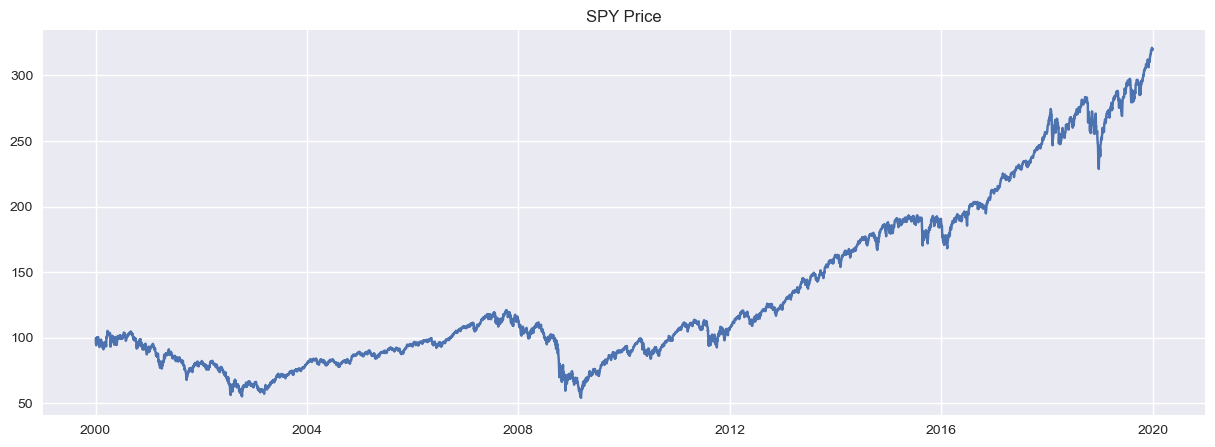

In [16]:
# Visualization 
plt.figure(figsize=(15,5))
plt.title('SPY Price')
plt.plot(data);

### Train - Test - Split

In [17]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(data, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 4024, 1007


### Preprocessing

In [18]:
# Scale the features MinMax for training and test datasets
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data)
# use the formation from the train-set to transform the test-set, to make datasets consistent
scaled_test_data = scaler.transform(test_data) 

### Generate sequences

We'll create a function to generate sequence in the format required for deep sequence modeling.

In [19]:
def generate_sequence(data, sequence_length=60):
    
    # create X & y data array
    X = []
    y = []

    for i in range(sequence_length, len(data)):
        X.append(data[i - sequence_length:i, 0])
        y.append(data[i, 0])
    
    # Converting x_train and y_train to Numpy arrays
    return np.array(X), np.array(y)

In [20]:
# sequence length
lookback = 60

In [21]:
X_train, y_train = generate_sequence(data=scaled_train_data, sequence_length=lookback)
print(f'X_train: {X_train.shape}, y_train {y_train.shape}')

X_train: (3964, 60), y_train (3964,)


In [22]:
X_test, y_test = generate_sequence(data=scaled_test_data, sequence_length=lookback)
print(f'X_test: {X_test.shape}, y_test {y_test.shape}')

X_test: (947, 60), y_test (947,)


### Reshape

We need to reshape the data as LSTM network consume input in a 3-dimensional array in the form of `n_samples` $\times$ `timesteps` $\times$ `n_features`.

In [23]:
# reshaping array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = y_train[:, np.newaxis] 

# check the array size
print(f'X_train Shape: {X_train.shape}, y_train {y_train.shape}')

X_train Shape: (3964, 60, 1), y_train (3964, 1)


In [24]:
# reshaping array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = y_test[:, np.newaxis] 

# check the array size
print(f'X_test Shape: {X_test.shape}, y_test {y_test.shape}')

X_test Shape: (947, 60, 1), y_test (947, 1)


### Building a LSTM Model

- First, we define the LSTM Recurrent Neural Network by initializing the **Sequential** Model. 
- We'll add more **LSTM** layers and adjust the **Dropout** in order to improve the accuracy of our model. 
- Finally, a **Dense** layer is used as output layer.

Next, we compile and train the model defined above. Iteratively, we can increase or decrease the epochs and batch size to get more accuracy.

In [25]:
# Create a model
def create_model(hu=256, lookback=60):

    tensorflow.keras.backend.clear_session()   
    
    # instantiate the model
    model = Sequential()
    model.add(LSTM(units=hu, input_shape=(lookback, 1), activation = 'relu', return_sequences=False, name='LSTM'))
    model.add(Dense(units=1, name='Output'))              # can also specify linear activation function 
    
    # specify optimizer separately (preferred method))
#     opt = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    opt = Adam(lr=0.001, epsilon=1e-08, decay=0.0)       # adam optimizer seems to perform better for a single lstm
    
    # model compilation
    model.compile(optimizer=opt, loss='mse', metrics=['mae'])
    
    return model

In [26]:
# lstm network
model = create_model(hu=10, lookback=lookback)

In [42]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM (LSTM)                 (None, 10)                480       
                                                                 
 Output (Dense)              (None, 1)                 11        
                                                                 
Total params: 491 (1.92 KB)
Trainable params: 491 (1.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
plot_model(model, to_file='./img/model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Train the model

In [29]:
# Specify callback functions
model_path = (results_path / 'model.h5').as_posix()
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

my_callbacks = [
    EarlyStopping(patience=10, monitor='loss', mode='min', verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath=model_path, verbose=1, monitor='loss', save_best_only=True),
    TensorBoard(log_dir=logdir, histogram_freq=1)
]

In [30]:
%%time
# Model fitting
lstm_training = model.fit(X_train, 
                          y_train, 
                          batch_size=64, 
                          epochs=500, 
                          verbose=1, 
                          callbacks=my_callbacks, 
                          shuffle=False)

Epoch 1/500
51/62 [=======================>......] - ETA: 0s - loss: 0.0139 - mae: 0.1022
Epoch 1: loss improved from inf to 0.01219, saving model to results/lstm_time_series/model.h5
62/62 [==============================] - 1s 5ms/step - loss: 0.0122 - mae: 0.0944
Epoch 2/500
61/62 [============================>.] - ETA: 0s - loss: 0.0051 - mae: 0.0616
Epoch 2: loss improved from 0.01219 to 0.00500, saving model to results/lstm_time_series/model.h5
62/62 [==============================] - 0s 5ms/step - loss: 0.0050 - mae: 0.0612
Epoch 3/500
55/62 [=========================>....] - ETA: 0s - loss: 0.0040 - mae: 0.0480
Epoch 3: loss improved from 0.00500 to 0.00359, saving model to results/lstm_time_series/model.h5
62/62 [==============================] - 0s 5ms/step - loss: 0.0036 - mae: 0.0447
Epoch 4/500
55/62 [=========================>....] - ETA: 0s - loss: 9.5216e-04 - mae: 0.0250
Epoch 4: loss improved from 0.00359 to 0.00091, saving model to results/lstm_time_series/model.h5
62

57/62 [==========================>...] - ETA: 0s - loss: 1.9292e-04 - mae: 0.0105
Epoch 33: loss did not improve from 0.00018
62/62 [==============================] - 0s 5ms/step - loss: 2.1161e-04 - mae: 0.0109
Epoch 34/500
56/62 [==========================>...] - ETA: 0s - loss: 2.0308e-04 - mae: 0.0108Restoring model weights from the end of the best epoch: 24.

Epoch 34: loss did not improve from 0.00018
62/62 [==============================] - 0s 5ms/step - loss: 2.2018e-04 - mae: 0.0112
Epoch 34: early stopping
CPU times: user 11.1 s, sys: 534 ms, total: 11.6 s
Wall time: 10.9 s


### Evaluate model performance

In [31]:
%load_ext tensorboard

In [32]:
%tensorboard --logdir logs

In [33]:
# calculate rmse of loss function
train_rmse_scaled = np.sqrt(model.evaluate(X_train, y_train, verbose=0))
test_rmse_scaled = np.sqrt(model.evaluate(X_test, y_test, verbose=0))
print(f'Train RMSE: {train_rmse_scaled[0]:.4f} | Test RMSE: {test_rmse_scaled[0]:.4f}')

Train RMSE: 0.0158 | Test RMSE: 0.0320


### Prediction

In [34]:
# predictions
y_pred = model.predict(X_test)

30/30 [==============================] - 0s 1ms/step


In [35]:
df = pd.DataFrame({
    'actual': scaler.inverse_transform(y_test).flatten(),
    'prediction': scaler.inverse_transform(y_pred).flatten()}, 
    index = test_data[lookback:].index)

df['spread'] = df['prediction'] - df['actual']
df

,actual,prediction,spread
Date,,,
2016-03-30,190.409622,188.833298,-1.576324
2016-03-31,189.947510,189.242630,-0.704880
2016-04-01,191.241440,189.490509,-1.750931
2016-04-04,190.622208,189.926346,-0.695862
2016-04-05,188.718277,190.172836,1.454559
...,...,...,...
2019-12-24,319.352142,310.634796,-8.717346
2019-12-26,321.052124,311.429413,-9.622711
2019-12-27,320.972565,312.331329,-8.641235


In [36]:
print(f'R-square: {r2_score(df.actual, df.prediction):0.4}')

R-square: 0.9829


### Plot Results

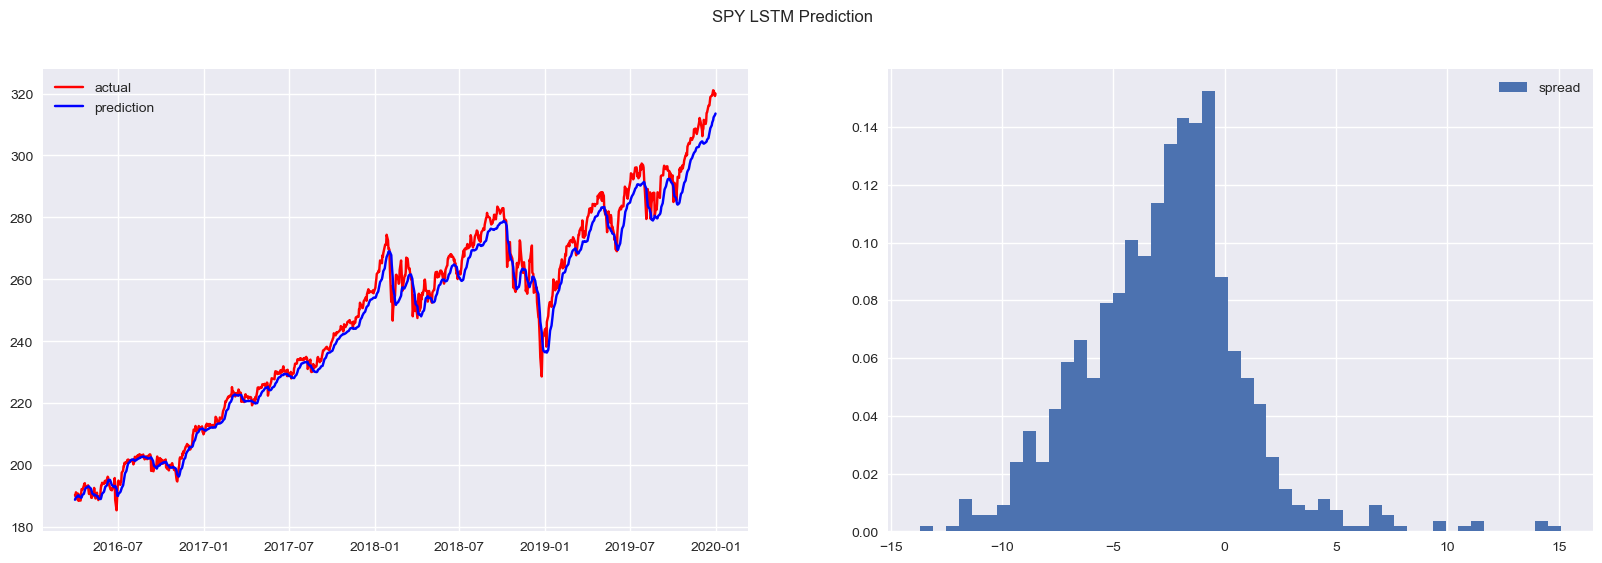

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

ax[0].plot(df.actual, color='red', label='actual')
ax[0].plot(df.prediction, color='blue', label='prediction')
ax[1].hist(df.spread, bins=50, density=True, label='spread')

ax[0].legend()
ax[1].legend()

plt.suptitle('SPY LSTM Prediction');

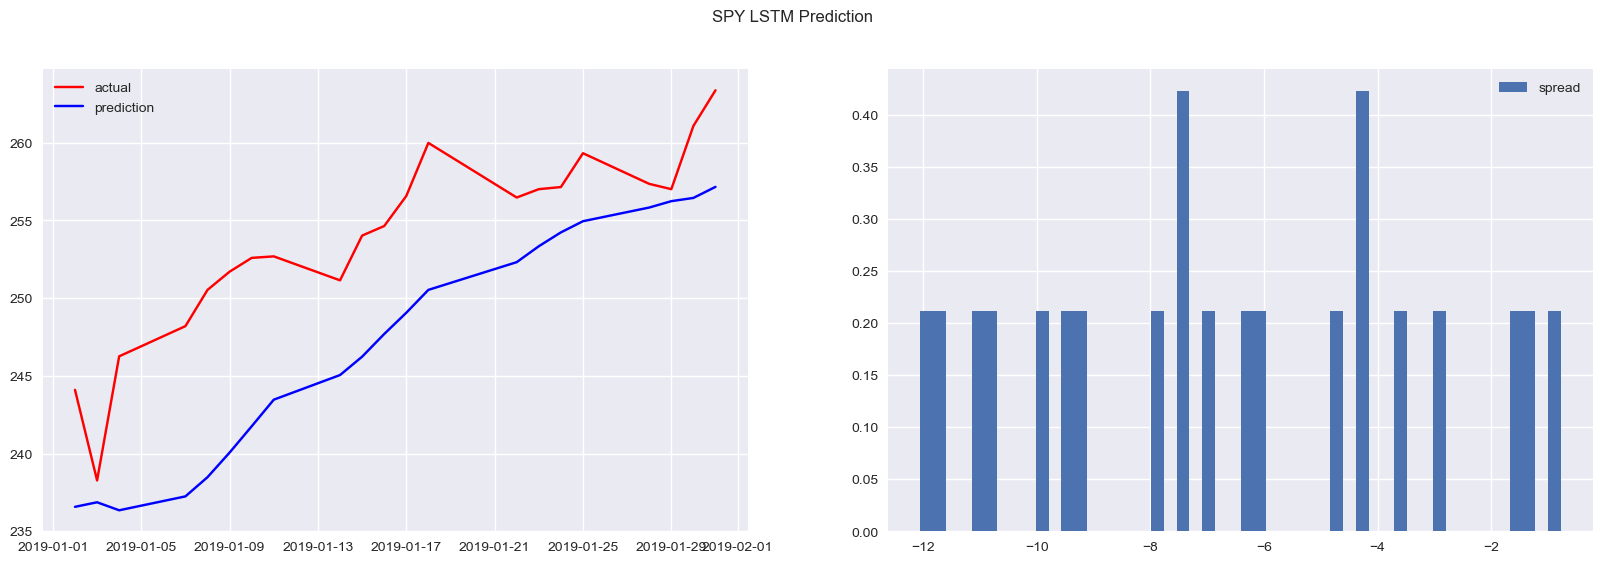

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

ax[0].plot(df.actual['2019-01'], color='red', label='actual')
ax[0].plot(df.prediction['2019-01'], color='blue', label='prediction')
ax[1].hist(df.spread['2019-01'], bins=50, density=True, label='spread')

ax[0].legend()
ax[1].legend()

plt.suptitle('SPY LSTM Prediction');